In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [4]:
df = pd.read_csv('datasets/diabetes.csv')
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

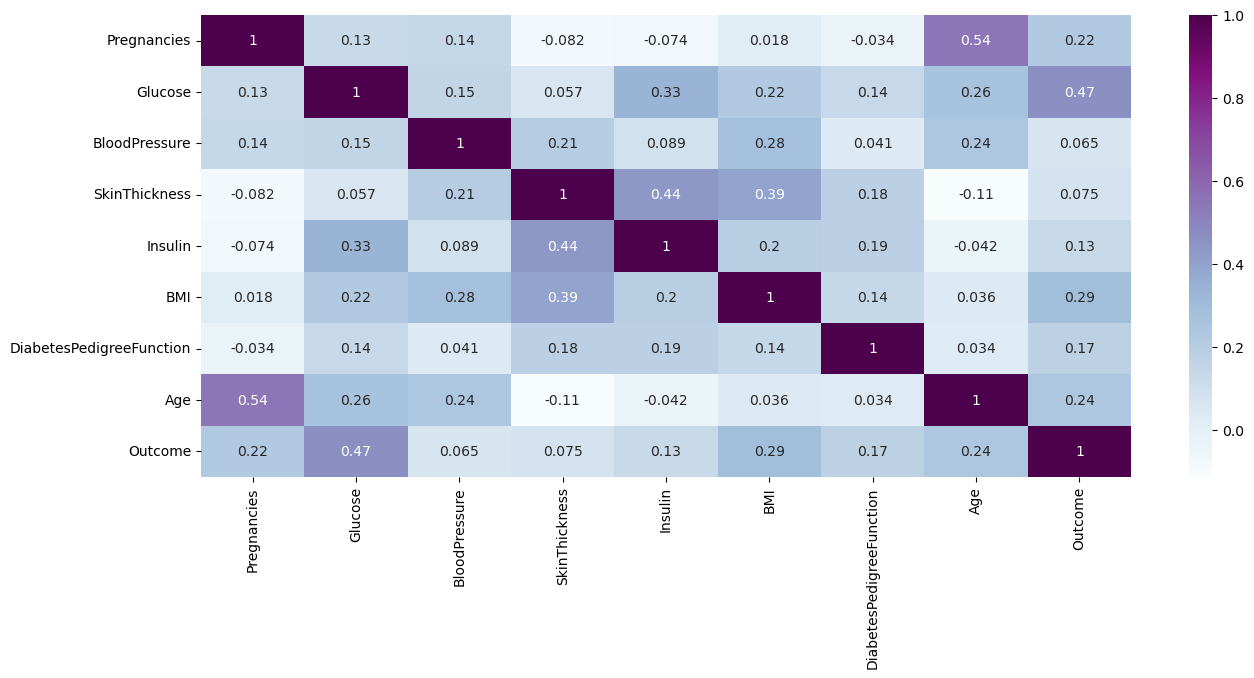

In [8]:
cr = df.corr()
plt.figure(figsize=(15,6))
sb.heatmap(cr, annot=True, cmap='BuPu')
plt.show()

In [9]:
df.duplicated().sum()

0

In [10]:
x = df.iloc[:,:8]
y = df.iloc[:,8:]

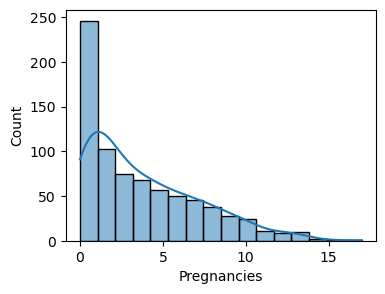

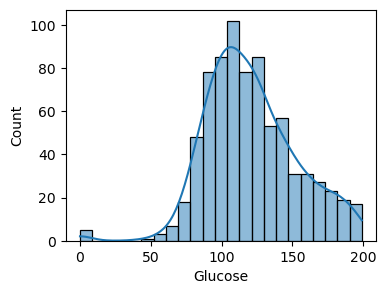

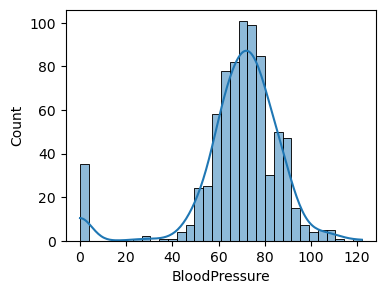

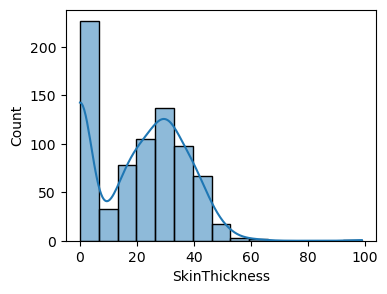

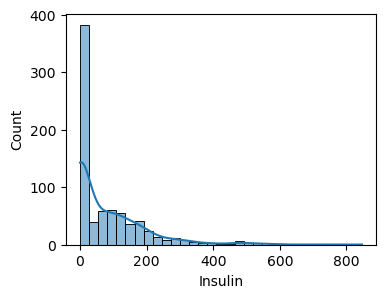

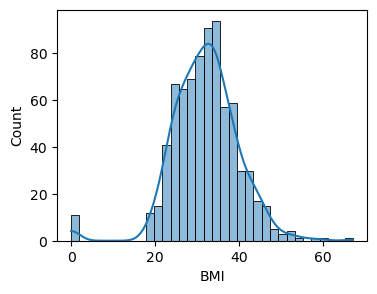

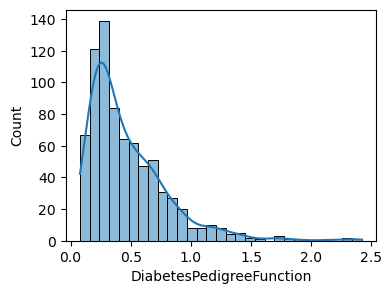

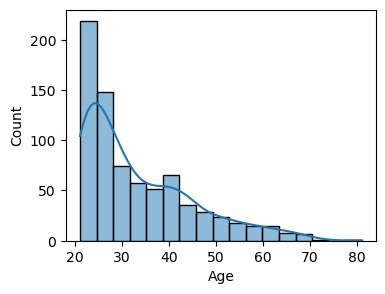

In [11]:
for i in x.columns:
    plt.figure(figsize=(4,3))
    sb.histplot(df[i], kde=True)
    plt.show()

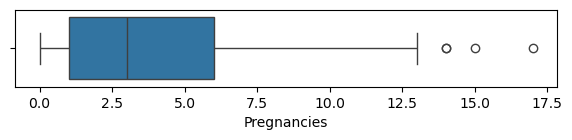

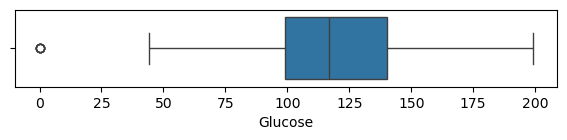

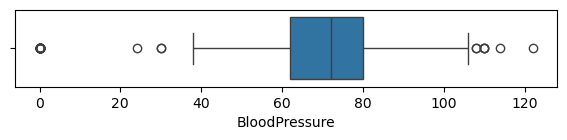

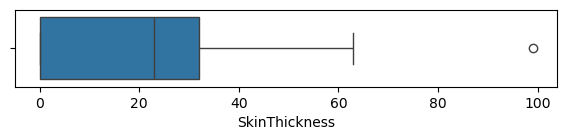

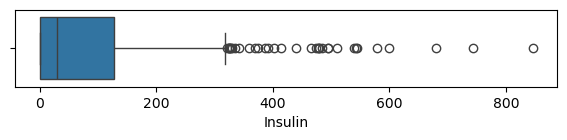

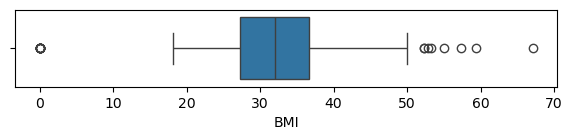

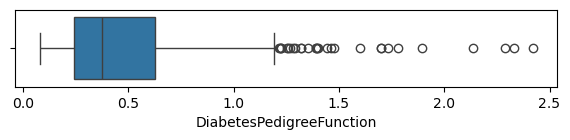

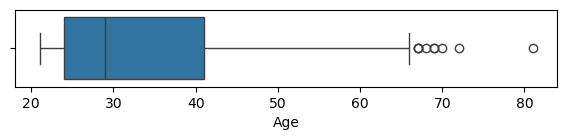

In [12]:
for i in x.columns:
    plt.figure(figsize=(7,1))
    sb.boxplot(df[i], orient='h')
    plt.show()

In [13]:
outlier_variables = x.columns

In [14]:
def outlier_limits(var):
    Q1 = np.percentile(df[var],25)
    Q3 = np.percentile(df[var],75)
    IQR = Q3 - Q1
    
    upper_limit = Q3 + (1.5*IQR)
    lower_limit = Q1 - (1.5*IQR)
      
    return upper_limit, lower_limit   

In [15]:
def check_outliers(var):
    
    upper_w, lower_w = outlier_limits(var) 
    
    if df[( df[var] > upper_w  )|( df[var] < lower_w  )].shape[0]:
        treat_outliers(var, upper_w, lower_w) 

In [16]:
def treat_outliers(var, upper_limit, lower_limit):      
           
    if df[  df[var] < lower_limit ].shape[0]:        
        df.loc[ df[var] < lower_limit, var ] = lower_limit
        
    if df[  df[var] > upper_limit ].shape[0]:        
        df.loc[ df[var] > upper_limit, var ] = upper_limit

In [17]:
for var in outlier_variables:    
    check_outliers(var)

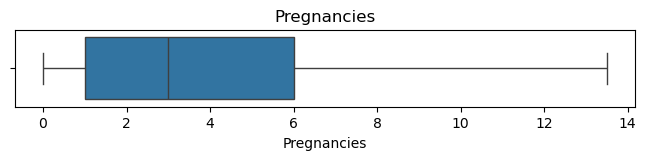

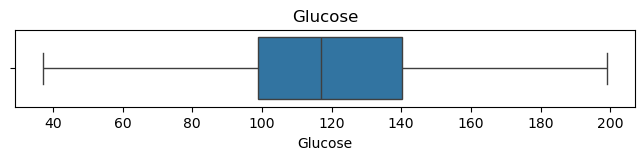

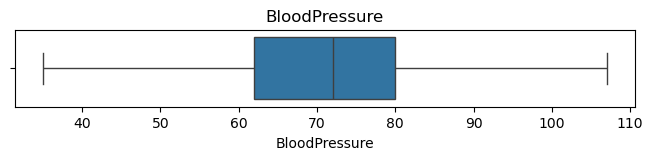

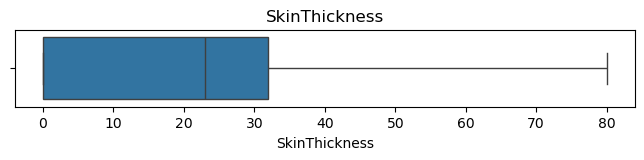

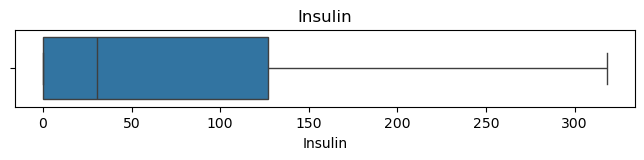

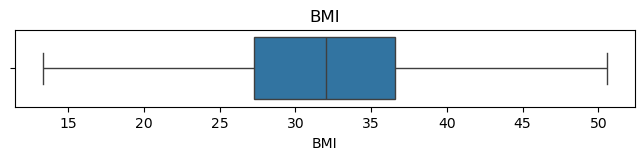

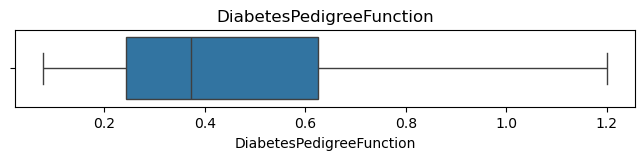

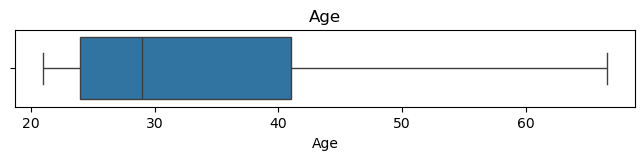

In [18]:
for var in outlier_variables:    
    plt.figure(figsize=(8,1))
    sb.boxplot(df[var],orient='h')
    plt.title(var)
    plt.show()

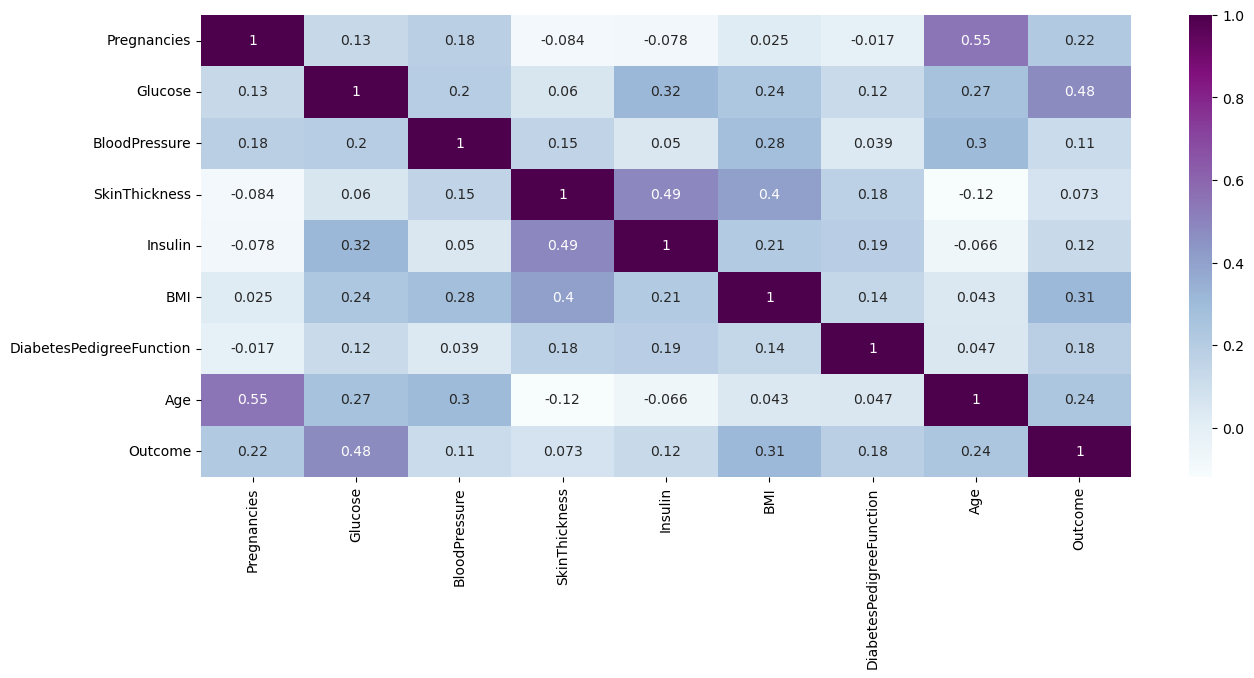

In [19]:
cr = df.corr()
plt.figure(figsize=(15,6))
sb.heatmap(cr, annot=True, cmap='BuPu')
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss_x = ss.fit_transform(x)
new_x = pd.DataFrame(ss_x)
new_x.columns = list(x.columns)

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [22]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
LR_model.fit(x_train,y_train)

LogisticRegression()

In [23]:
print("Coefficients:", LR_model.coef_)
print("Intercept:", LR_model.intercept_)

Coefficients: [[ 0.15676475  0.03656384 -0.01660862  0.00546098 -0.00133408  0.09996211
   0.90801487  0.0099097 ]]
Intercept: [-8.63229223]


In [24]:
yhat_train = LR_model.predict(x_train)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       342
           1       0.75      0.62      0.67       195

    accuracy                           0.78       537
   macro avg       0.77      0.75      0.76       537
weighted avg       0.78      0.78      0.78       537



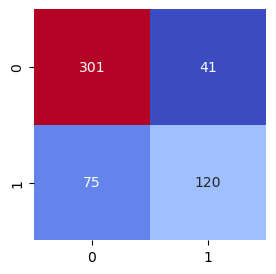

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
plt.figure(figsize=(3,3))
cm = confusion_matrix(y_train,yhat_train)
sb.heatmap(cm, cmap='coolwarm', annot=True, fmt='d', cbar=False)
print(classification_report(y_train,yhat_train))
plt.show()

In [26]:
def plot_roc(y,yhat):
    plt.figure(figsize=(3,3))

    plt.title('AUC - ROC Curve', fontsize=15)
    plt.ylabel('False Positive Rate(FPR)')
    plt.xlabel('True Positive Rate(TPR)')
    fpr,tpr, thresh = roc_curve(y, yhat)
    auc = roc_auc_score(y_train, yhat_train)
    auc
    plt.plot(fpr,tpr)    
    plt.show()

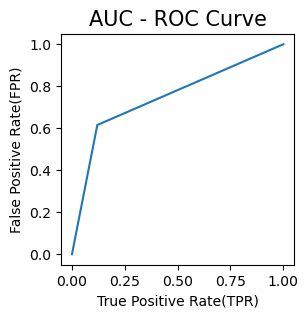

In [27]:
plot_roc(y_train,yhat_train)

In [28]:
yhat_test = LR_model.predict(x_test)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       158
           1       0.64      0.56      0.60        73

    accuracy                           0.76       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.76      0.76      0.76       231



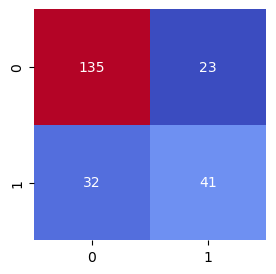

In [29]:
plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,yhat_test)
sb.heatmap(cm, cmap='coolwarm', annot=True, fmt='d', cbar=False)
print(classification_report(y_test,yhat_test))
plt.show()

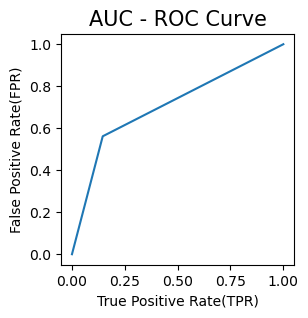

In [30]:
plot_roc(y_test,yhat_test)

### Q1. What is the difference between precision and recall?

<u><b>Precision:</b></u> Out of all predicted values, how many are actually correct?

       Precision = True Positives/ (True Positive + False Positive)

<u><b>Recall:</b></u> Out of all actual positive values, how many are correctly identified

      Recall = True Positives/ (True Positive + False Negative) 

### Q2. What is cross-validation, and why is it important in binary classification?

##### Instead of training and testing model on single split of data, cross-validation divides the dataset into multiple parts and rotates the part of dataset for testing

CV reduces overfitting and gives better result. It also allowes hyperparameter tuning which helps compare best parameters and models